<img src="https://i.imgur.com/d28OeSq.png" width="350px" align="right">

# `Finance With Python` 

## <font color=red> Video Overview
* static two state economy: fundamental theorem of asset pricing
* static three state ec: dealing with mkt incompleteness
* state multi-state ec: generalizing the state space
* dynamic ec: modeling uncertainty over time

In [1]:
import numpy as np
import pandas as pd

## <font color=red> __Static Two State Economy__

### <font color=red> Cash

In [2]:
c = 10 # c = cash

In [3]:
c = 5.75
type(c)

float

### <font color=red> Interest Rate

In [4]:
i = 0.1

In [5]:
df = 1 / (1 + i)

In [6]:
df

0.9090909090909091

### <font color=red> Present Value &mdash; Python

In [7]:
c * df  # simple present value on n of 1

5.2272727272727275

In [8]:
cl = [10, 12.5, 15, 20]

In [9]:
for c in cl:
    print(c)

10
12.5
15
20


In [10]:
for c in cl:
    print(c * df)

9.09090909090909
11.363636363636363
13.636363636363637
18.18181818181818


In [11]:
for t in range(4):
    print(cl[t]) # print by index example

10
12.5
15
20


In [12]:
cl[0] # was simple indexing example

10

In [13]:
for t in range(4):
    print(cl[t] / (1 + i) ** t)  # tvm example for cashflows

10.0
11.363636363636363
12.396694214876032
15.02629601803155


In [14]:
sum(cl) #sum of cashflows

57.5

In [15]:
s = 0
for t in range(4):
    s += (cl[t] / (1 + i) ** t)  # inplace addition for summing present value with discount rate
print(s)

48.78662659654395


## <font color=red> Present Value &mdash; Numpy 

In [16]:
a = np.arange(4) # remember that arange is similar to range

In [17]:
a[2] # simple indexing example

2

In [18]:
a = np.array(cl)
a

array([10. , 12.5, 15. , 20. ])

#### <font color=red> Vectorized Operations with Numpy

In [19]:
2 * cl

[10, 12.5, 15, 20, 10, 12.5, 15, 20]

In [20]:
cl + cl # only appends or concatentes a list

[10, 12.5, 15, 20, 10, 12.5, 15, 20]

In [21]:
2 * a # scalar operations in linear algebra

array([20., 25., 30., 40.])

In [22]:
a + a # array has element wise operations

array([20., 25., 30., 40.])

In [23]:
a - a # more element wise ops

array([0., 0., 0., 0.])

In [24]:
a / a

array([1., 1., 1., 1.])

In [25]:
a # scalar ops do not effect original array

array([10. , 12.5, 15. , 20. ])

In [26]:
t = np.arange(4)
t

array([0, 1, 2, 3])

In [27]:
a ** 2 # showing more basic ops

array([100.  , 156.25, 225.  , 400.  ])

In [28]:
2 ** a

array([1.02400000e+03, 5.79261875e+03, 3.27680000e+04, 1.04857600e+06])

In [29]:
(1 + i) ** t

array([1.   , 1.1  , 1.21 , 1.331])

In [30]:
(1 + i) ** (-t)

array([1.        , 0.90909091, 0.82644628, 0.7513148 ])

In [31]:
a

array([10. , 12.5, 15. , 20. ])

In [32]:
df

0.9090909090909091

In [33]:
a * df

array([ 9.09090909, 11.36363636, 13.63636364, 18.18181818])

In [34]:
sum (a * df)

52.27272727272727

## <font color=red> Traded Financial Assets

* Static TWO state economy

In [35]:
S = np.array((20., 5.)) # stock pays either 20 or 5 tomorrow

In [36]:
S0 = 10. # define price today

In [37]:
B = np.array((11., 11.)) # introduce a riskless asset, a bond

In [38]:
B0 = 10. # using . makes the variable a float

## <font color=red> The Market 

In [39]:
M = np.array((S, B)).T # market matrix # capital T transposes M

In [40]:
M

array([[20., 11.],
       [ 5., 11.]])

In [41]:
M0 = np.array((S0, B0)) # the market at time zero
M0

array([10., 10.])

## <font color= red> A portfolio 

In [42]:
phi = np.array((2, 3)) # the greek letter phi for portolio; this is a vector; 2 stocks and 3 bonds
phi

array([2, 3])

In [43]:
phi[0] * S + phi[1] * B # explicit way of constructing overal portfolio payoff of buying today and tomorrow

array([73., 43.])

In [44]:
phi[0] * S0 + phi[1] * B0 # 

50.0

In [45]:
np.dot(M, phi)

array([73., 43.])

In [46]:
phi = np.array((2, -3)) # the greek letter phi for portolio; this is a vector; 2 stocks and 3 bonds
phi

array([ 2, -3])

In [47]:
phi[0] * S + phi[1] * B # explicit way of constructing overal portfolio payoff of buying today and tomorrow

array([  7., -23.])

In [48]:
phi[0] * S0 + phi[1] * B0 # 

-10.0

In [49]:
np.dot(M, phi) # same as phi[0] * S + phi[1] * B

array([  7., -23.])

## <font color=red> A Call Option 

In [50]:
K = 15.
C = np.maximum(S - K, 0) # max function makes sure the lowest is 0

In [51]:
S - K

array([  5., -10.])

## <font color=red> Expected Return

In [52]:
def ret(x, x0):
    return x.mean() / x0 - 1

In [53]:
S.mean() / S0 - 1 # S.mean = avg value of the future payoff :: S.mean / S0 == relative performance

0.25

In [54]:
"""checking stock return"""
rS = ret(S, S0)
rS

0.25

In [55]:
'''Checking bond return'''
rB = ret(B, B0)
rB

0.10000000000000009

## <font color= red> Option Valuation &mdash; Wrong Way 

In [56]:
C.mean() / (1 + rS) # discounting with exp ret of stock

2.0

In [57]:
C.mean() / (1 + rB) # discounting with exp ret of bond

2.2727272727272725

## <font color=red> Span of Financial Traded Assets

Span is a linear algebra term: a linear combo of two vectors representing the uncertain future payoff of our two assets similar to np.dot (explicit) and phi[0] * S + phi[1] * B (matrix form)


All the results that we can expect for different values of phi0 and phi1


In [58]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline 

In [59]:
'''random allocation to stock'''
s = np.random.random(250) # 250 reps amount of pseudo random numbers into array object

In [60]:
'''random allocation to bonds; the complement of stocks: S + B = 1'''
1 - s 

array([0.1439152 , 0.61932603, 0.40552209, 0.28552553, 0.12575326,
       0.70245871, 0.10017182, 0.9975142 , 0.2719497 , 0.29461359,
       0.21359592, 0.53912599, 0.13242135, 0.0242027 , 0.33436483,
       0.70018647, 0.71611215, 0.70127772, 0.56171046, 0.67305758,
       0.26454751, 0.17105936, 0.16170284, 0.13938738, 0.15032449,
       0.42805067, 0.85357187, 0.82813503, 0.01940636, 0.94439595,
       0.52742173, 0.08767833, 0.09798795, 0.88593715, 0.8861059 ,
       0.88259678, 0.59769056, 0.45946324, 0.79688338, 0.59936037,
       0.731636  , 0.13014533, 0.40156847, 0.35102867, 0.05764236,
       0.20420382, 0.59931845, 0.85912919, 0.64209171, 0.83827974,
       0.96272607, 0.74530641, 0.5956775 , 0.27771222, 0.18723525,
       0.50216173, 0.13311451, 0.95677454, 0.15312308, 0.68302758,
       0.85966893, 0.56266109, 0.91503899, 0.95473537, 0.31802467,
       0.3876915 , 0.50713284, 0.70508992, 0.25798129, 0.50273095,
       0.72850299, 0.14884557, 0.21515788, 0.9391163 , 0.27261

In [61]:
s[0] * S + (1 - s[0]) * B

array([18.70476323,  5.86349118])

In [62]:
phi = np.array((s[0], 1 - s[0]))
phi

array([0.8560848, 0.1439152])

In [63]:
np.dot(M, phi) # same as s[0] * S + (1 - s[0]) * B

array([18.70476323,  5.86349118])

In [64]:
'''collecting the data set of 250 pseudo randoms'''
# a list object
pl = []
for i in s:
    pl.append(i * S + (1 - i) * B) # did not need to index i in s[i]

In [65]:
pl = np.array(pl)

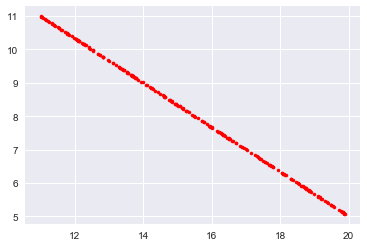

In [66]:
plt.plot(pl[:,0], pl[:,1], 'r.');

In [67]:
'''random allocation to stock using standard_normal dist'''
s = np.random.standard_normal(250) # 250 reps amount of pseudo random numbers into array object
s

array([ 2.58503443e-01,  1.50630996e+00,  1.68052951e+00,  6.18551193e-01,
       -8.84734139e-01, -1.47071067e+00, -1.14656328e-01,  5.77612000e-01,
        7.89612799e-02, -1.12575982e+00, -7.20415646e-01,  3.51996004e-01,
       -1.05358148e+00,  2.49625983e-01,  1.90042552e+00,  5.27731106e-01,
       -1.50250487e+00, -8.13962768e-03, -2.09960603e-01, -7.11873757e-01,
       -8.25102299e-01, -1.68782295e+00,  2.56876240e-02,  8.77525245e-01,
       -6.61614401e-01,  3.59797260e-01,  1.53664674e+00, -1.64685410e+00,
        3.51514266e-02, -6.51992351e-01, -1.21596138e+00, -3.71322981e-01,
        1.91407611e-01, -1.17396224e+00,  2.25434387e-01,  1.21343910e-01,
        3.98460016e-01,  3.50951454e-01, -7.74238234e-01,  1.74474194e+00,
       -2.06955492e-01, -7.44719669e-01,  3.96693697e-01,  1.09311226e+00,
        8.41693306e-01, -1.66121344e-01,  3.17737319e-01, -2.48332108e-01,
        9.69514763e-01, -5.30929170e-01,  2.21486225e-01,  5.28791823e-01,
       -9.32731486e-01, -

In [68]:
'''collecting the data set of 250 pseudo randoms'''
# a list object
pl = []
for i in s:
    pl.append(i * S + (1 - i) * B) # did not need to index i in s[i]

In [69]:
pl = np.array(pl)

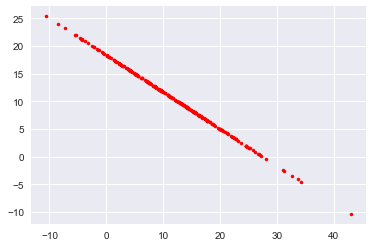

In [70]:
plt.plot(pl[:,0], pl[:,1], 'r.');

In [75]:
'''random allocation to stock'''
s = np.random.random(250) # 250 reps amount of pseudo random numbers into array object
b = np.random.random(250)

In [79]:
'''collecting the data set of 250 pseudo randoms'''
# a list object
pl = []
for i in range(len(s)):
    pl.append(s[i] * S + (1 - b[i]) * B) # replace s with b in (1 - s[i])

In [80]:
pl = np.array(pl)

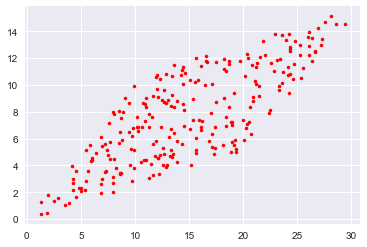

In [83]:
'''producing a plane in the space while constraining random numbers'''
plt.plot(pl[:,0], pl[:,1], 'r.');

In [88]:
'''using standard_normal; neg & pos payoffs; further away from 0 - 1 bounds'''
s = np.random.standard_normal(250) # 250 reps amount of pseudo random numbers into array object
b = np.random.standard_normal(250)

In [100]:
'''collecting the data set of 250 pseudo randoms'''
pl = []# a list object
for i in range(len(s)):
    pl.append(s[i] * S + (1 - b[i]) * B) # replace s with b in (1 - s[i])

In [101]:
pl = np.array(pl)

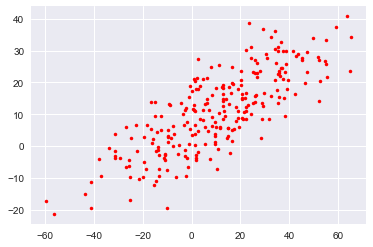

In [102]:
'''producing a plane in the space while constraining random numbers'''
plt.plot(pl[:,0], pl[:,1], 'r.');

## <font color=red> Replication of the Option Payoff

In [103]:
'''replicating phi'''
phi = np.linalg.solve(M, C)
phi

array([ 0.33333333, -0.15151515])

In [104]:
np.dot(M, phi).round(3)

array([5., 0.])

In [105]:
'''arbitrage free price'''
'''if the price is lower than what we see here than arbitrage opportunities may be possible'''
np.dot(M0, phi).round(3) # M0 is the price vector

1.818

In [106]:
'''arbitrage free price'''
'''if the price is lower than what we see here than arbitrage opportunities may be possible'''
C0 = np.dot(M0, phi).round(3) # M0 is the price vector

In [107]:
ret(C, C0).round(3) # the correct discount rate

0.375

In [108]:
C.mean() / (1 + (ret(C, C0)))

1.818

## <font color=red> Risk-Return Comparison

In [109]:
def vol(x, x0):
    return (x / x0 - 1).std() # standard deviation

In [110]:
S / S0 -1

array([ 1. , -0.5])

In [111]:
(S / S0 -1).std()

0.75

In [113]:
'''same as above'''
vol(S, S0) 

0.75

In [115]:
ret(S, S0)

0.25

<font color= gray> __Repeat with b__

In [122]:
vol(b, B0).round(3)

0.106

In [123]:
ret(b, B0).round(3)

-1.002

<font color= grey> __Repeat with C__

In [124]:
'''calculate the risk of the call option'''
'''137% = well above the vol of the stock, therefor higher return'''
vol(C, C0).round(3)

1.375

In [125]:
ret(C, C0).round(3)

0.375

<img src="https://i.imgur.com/d28OeSq.png" width="350px" align="right">